<a href="https://colab.research.google.com/github/sorrrrrr/aa03-iot/blob/master/iot_csv_aa03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Pandas: Loading the remote csv file

> [Pandas: Tutorial-reas_csv()](https://www.marsja.se/pandas-read-csv-tutorial-to-csv/amp/)

In [0]:
import pandas as pd

In [0]:
# url="http://chaos.inje.ac.kr:3030/data/ppg5k.csv"  # CORS powered express server!
c=pd.read_csv('AA03_s1000.csv', index_col='date')

In [3]:
c.shape

(1000, 3)

In [4]:
c.head()

,temperature,humidity,luminosity
date,,,
2018-11-27 19:19:48.503,20.7,28.3,125
2018-11-27 19:19:46.226,20.7,28.3,125
2018-11-27 19:19:43.948,20.7,28.3,126
2018-11-27 19:19:41.667,20.7,28.3,125
2018-11-27 19:19:39.389,20.7,28.3,126


In [5]:
c.tail()

,temperature,humidity,luminosity
date,,,
2018-11-27 18:42:04.907,20.7,29.1,114
2018-11-27 18:42:02.630,20.7,29.1,120
2018-11-27 18:42:00.353,20.7,29.1,121
2018-11-27 18:41:58.072,20.7,29.1,122
2018-11-27 18:41:55.794,20.8,29.1,119


In [6]:
c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 2018-11-27 19:19:48.503 to 2018-11-27 18:41:55.794
Data columns (total 3 columns):
temperature    1000 non-null float64
humidity       1000 non-null float64
luminosity     1000 non-null int64
dtypes: float64(2), int64(1)
memory usage: 31.2+ KB


In [8]:
# another method to read csv 
c2=pd.read_csv('AA03_s1000.csv', index_col=0)
c2.head()

,temperature,humidity,luminosity
date,,,
2018-11-27 19:19:48.503,20.7,28.3,125
2018-11-27 19:19:46.226,20.7,28.3,125
2018-11-27 19:19:43.948,20.7,28.3,126
2018-11-27 19:19:41.667,20.7,28.3,125
2018-11-27 19:19:39.389,20.7,28.3,126


In [0]:
# import matplotlib.pyplot as plt
%matplotlib inline

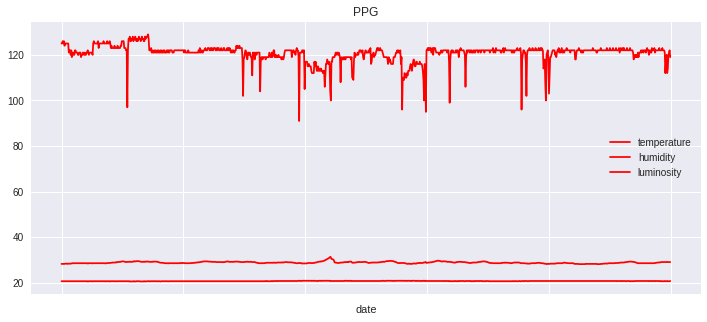

In [13]:
c.plot(figsize=(12,5), color='r', title="PPG")

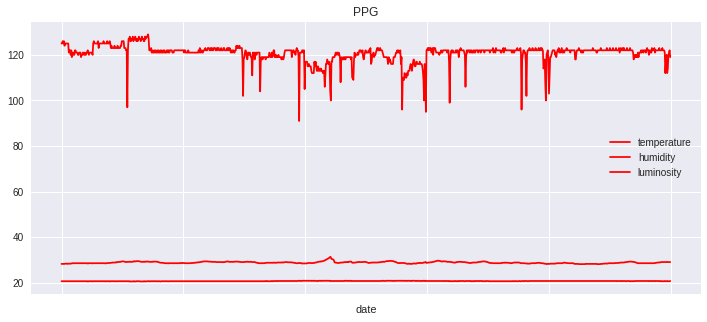

In [14]:
c[:1000].plot(figsize=(12,5), color='r', title="PPG")

### iot data
> Sensor data from Arduino with CdS and DHT22

- temperature
- humidity
- luminosity

In [0]:
url="http://chaos.inje.ac.kr:3030/data/iot_chaos.csv"
iot=pd.read_csv('AA03_s1000.csv', index_col='date')

In [16]:
iot.shape

(1000, 3)

In [17]:
iot.head()

,temperature,humidity,luminosity
date,,,
2018-11-27 19:19:48.503,20.7,28.3,125
2018-11-27 19:19:46.226,20.7,28.3,125
2018-11-27 19:19:43.948,20.7,28.3,126
2018-11-27 19:19:41.667,20.7,28.3,125
2018-11-27 19:19:39.389,20.7,28.3,126


In [19]:
iot.tail()

,temperature,humidity,luminosity
date,,,
2018-11-27 18:42:04.907,20.7,29.1,114
2018-11-27 18:42:02.630,20.7,29.1,120
2018-11-27 18:42:00.353,20.7,29.1,121
2018-11-27 18:41:58.072,20.7,29.1,122
2018-11-27 18:41:55.794,20.8,29.1,119


In [20]:
iot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 2018-11-27 19:19:48.503 to 2018-11-27 18:41:55.794
Data columns (total 3 columns):
temperature    1000 non-null float64
humidity       1000 non-null float64
luminosity     1000 non-null int64
dtypes: float64(2), int64(1)
memory usage: 31.2+ KB


### Sort index by date

In [0]:
iot_s = iot.sort_index()

In [23]:
iot_s.head()

,temperature,humidity,luminosity
date,,,
2018-11-27 18:41:55.794,20.8,29.1,119
2018-11-27 18:41:58.072,20.7,29.1,122
2018-11-27 18:42:00.353,20.7,29.1,121
2018-11-27 18:42:02.630,20.7,29.1,120
2018-11-27 18:42:04.907,20.7,29.1,114


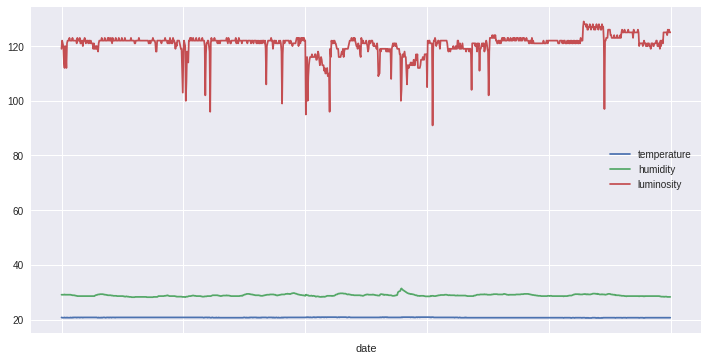

In [24]:
iot_s.plot(figsize=(12,6))

In [25]:
iot_s.mean()

temperature     20.7616
humidity        28.8778
luminosity     120.6220
dtype: float64

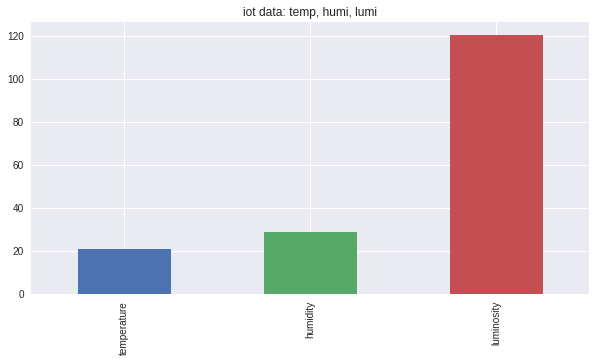

In [26]:
iot_s.mean().plot.bar(figsize=(10,5), title="iot data: temp, humi, lumi")

## Plot the change of sensor data over various time spans.

- resample the data at different frequency
- time span: 60 sec, 5min, 10min

In [27]:
iot_s.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 2018-11-27 18:41:55.794 to 2018-11-27 19:19:48.503
Data columns (total 3 columns):
temperature    1000 non-null float64
humidity       1000 non-null float64
luminosity     1000 non-null int64
dtypes: float64(2), int64(1)
memory usage: 31.2+ KB


In [28]:
# type of index
iot_s.index[0], type(iot_s.index[0])

('2018-11-27 18:41:55.794', str)

In [0]:
# Convert index to timestamp
iot_s.index = pd.to_datetime(iot_s.index)

In [30]:
iot_s.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2018-11-27 18:41:55.794000 to 2018-11-27 19:19:48.503000
Data columns (total 3 columns):
temperature    1000 non-null float64
humidity       1000 non-null float64
luminosity     1000 non-null int64
dtypes: float64(2), int64(1)
memory usage: 31.2 KB


In [37]:
# Estimate the mean of iot_s for every 1m
iot_s.resample('60S').mean()  # mean per each hour

,temperature,humidity,luminosity
date,,,
2018-11-27 18:41:00,20.750000,29.100000,120.500000
2018-11-27 18:42:00,20.744444,28.959259,120.629630
2018-11-27 18:43:00,20.792857,28.617857,121.285714
2018-11-27 18:44:00,20.757692,29.092308,121.692308
2018-11-27 18:45:00,20.796154,28.600000,122.153846
2018-11-27 18:46:00,20.800000,28.285185,122.000000
2018-11-27 18:47:00,20.800000,28.296154,121.576923
2018-11-27 18:48:00,20.800000,28.646154,121.730769
2018-11-27 18:49:00,20.800000,28.429630,118.185185


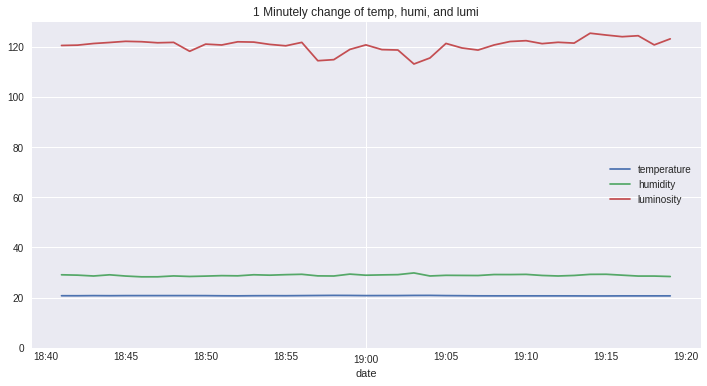

In [46]:
#  Plot mean of the iot data per every 1m 
iot_s.resample('60S').mean().plot(figsize=(12,6), title='1 Minutely change of temp, humi, and lumi', 
                                ylim=[0,130])

In [44]:
iot_s.resample('300S').mean()  # mean per each 5m

,temperature,humidity,luminosity
date,,,
2018-11-27 18:40:00,20.765060,28.889157,121.180723
2018-11-27 18:45:00,20.799242,28.450000,121.113636
2018-11-27 18:50:00,20.747328,28.814504,121.297710
2018-11-27 18:55:00,20.829545,29.017424,118.053030
2018-11-27 19:00:00,20.837879,29.118939,117.378788
2018-11-27 19:05:00,20.734351,28.984733,120.435115
2018-11-27 19:10:00,20.689394,28.965909,122.439394
2018-11-27 19:15:00,20.688189,28.782677,123.393701


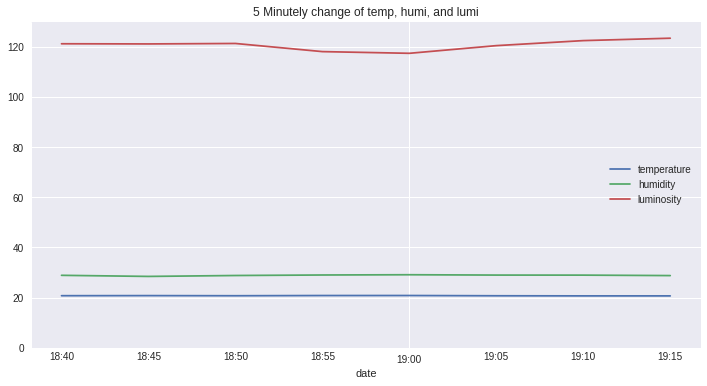

In [45]:
#  Plot mean of the iot data per every 5m 
iot_s.resample('300S').mean().plot(figsize=(12,6), title='5 Minutely change of temp, humi, and lumi', 
                                ylim=[0,130])

In [47]:
iot_s.resample('600S').mean()  # mean per each 10m

,temperature,humidity,luminosity
date,,,
2018-11-27 18:40:00,20.786047,28.619535,121.139535
2018-11-27 18:50:00,20.788593,28.916350,119.669202
2018-11-27 19:00:00,20.786312,29.052091,118.901141
2018-11-27 19:10:00,20.688803,28.876062,122.907336


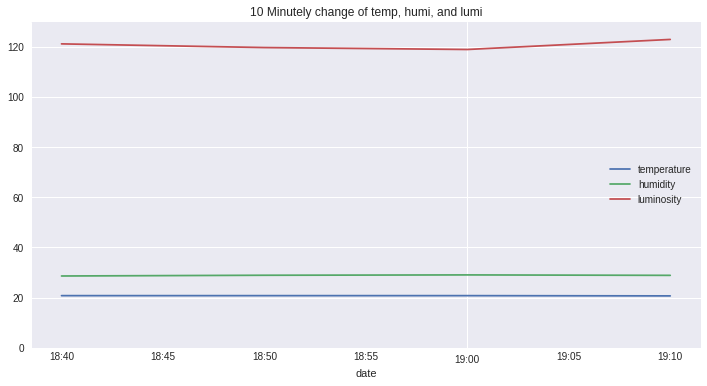

In [48]:
#  Plot mean of the iot data per every 10m 
iot_s.resample('600S').mean().plot(figsize=(12,6), title='10 Minutely change of temp, humi, and lumi', 
                                ylim=[0,130])

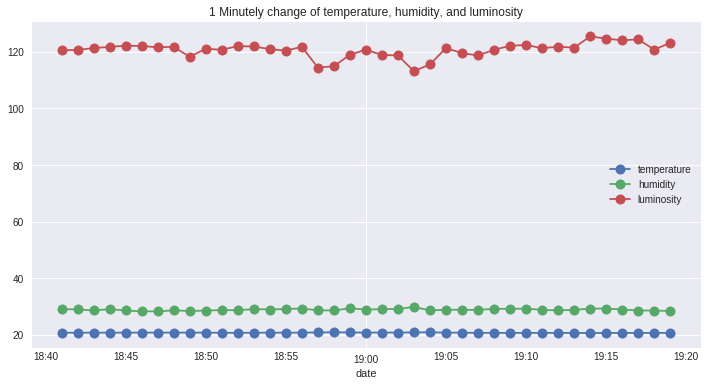

In [51]:
#  Plot mean of the iot data per 1m
iot_s.resample('60S').mean().plot(kind='line', marker='o', ms=10, figsize=(12,6), title='1 Minutely change of temperature, humidity, and luminosity')

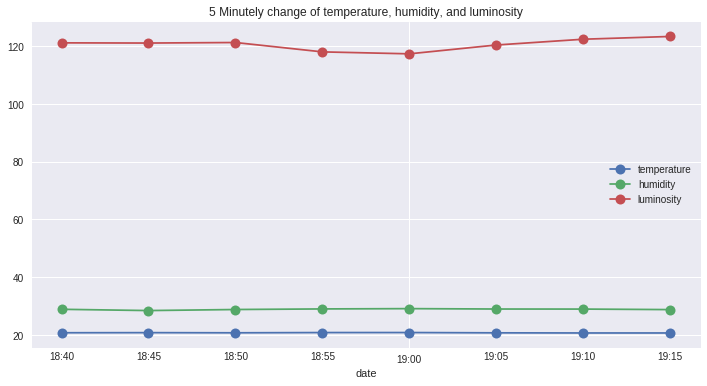

In [52]:
#  Plot mean of the iot data per 1m
iot_s.resample('300S').mean().plot(kind='line', marker='o', ms=10, figsize=(12,6), title='5 Minutely change of temperature, humidity, and luminosity')

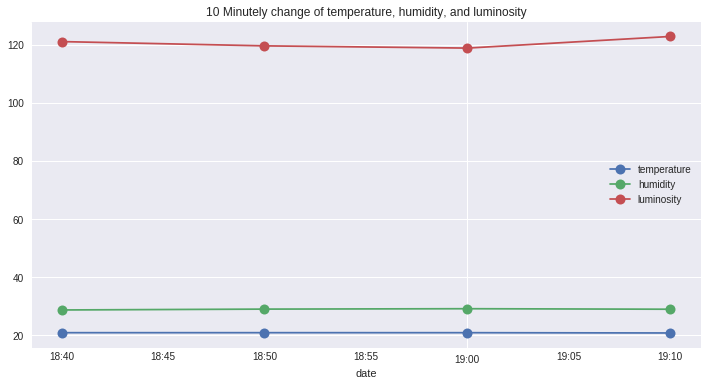

In [53]:
#  Plot mean of the iot data per 10m
iot_s.resample('600S').mean().plot(kind='line', marker='o', ms=10, figsize=(12,6), title='10 Minutely change of temperature, humidity, and luminosity')



---

